In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
#Exercise 1

import csv
with open("titanictrain.csv") as csv_file:
    csv_read=csv.reader(csv_file, delimiter = ",")
    my_df = pd.read_csv('./titanictrain.csv')
print(type(my_df)) #To find out the type of dataset

<class 'pandas.core.frame.DataFrame'>


In [68]:
#Exercise 2

#to check the number of rows and columns togerther with the data types;
my_df.shape
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#To view the columns with the first 5 rows for verification;
my_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#We can also check the basic statistics
my_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
missing = my_df.isnull().sum() #to check for missing values
duplicates = my_df[my_df.duplicated] #to check for duplicate rows
types = my_df.dtypes

In [10]:
#We can then use the above to create a list of problems as follows;

problems = []
problems.append(f"Missing values: {missing}")
problems.append(f"Duplicates: {duplicates}")
problems.append(f"Data types: {types}")
problems

['Missing values: PassengerId      0\nSurvived         0\nPclass           0\nName             0\nSex              0\nAge            177\nSibSp            0\nParch            0\nTicket           0\nFare             0\nCabin          687\nEmbarked         2\ndtype: int64',
 'Duplicates: Empty DataFrame\nColumns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]\nIndex: []',
 'Data types: PassengerId      int64\nSurvived         int64\nPclass           int64\nName            object\nSex             object\nAge            float64\nSibSp            int64\nParch            int64\nTicket          object\nFare           float64\nCabin           object\nEmbarked        object\ndtype: object']

In [7]:
#The main issue from the data is missing values in the Age, Cabin and Embarked columns

In [11]:
#Exercise 3(i):

print(my_df["Embarked"].unique())

['S' 'C' 'Q' nan]


In [85]:
my_df["Embarked"].value_counts()["S"]
my_df["Embarked"].value_counts()["C"]
my_df["Embarked"].value_counts()["Q"]

644

In [12]:
my_df["Embarked"].isnull().values.any()

True

In [13]:
my_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#From above Embarked missing values = 0.02%, Age = 19.9%, and Cabin = 77.1%

<Axes: >

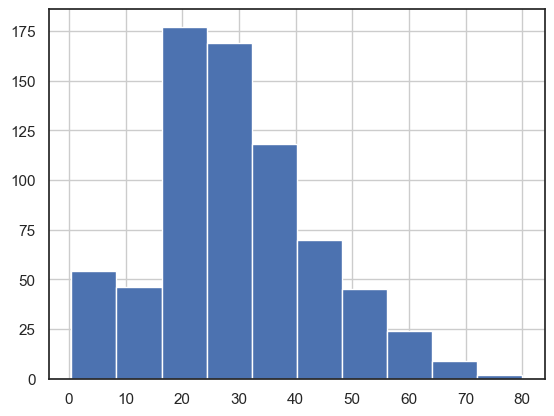

In [107]:
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter

my_df["Age"].hist()

In [ ]:
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax))

In [14]:
my_df[my_df["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [15]:
with open("titanictrain2.csv") as csv_file:
    csv_read = csv.reader(csv_file, delimiter = ",")
    newdf = pd.read_csv("./titanictrain2.csv")

In [13]:
newdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

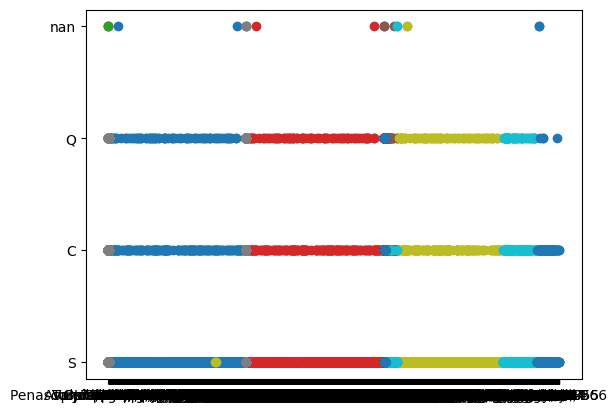

In [16]:
#Exercise 3(ii).

#Because the dataset contains columns with different data types. I started by creating a copy of my dataset (titanictraincopy).
#I converted the dataset to string type and verified the correlation between the column "Embarked" and all other columns.

#First Check;
#No association was between "Embarked" and any of the other columns as seen below.
newdf = newdf.astype(str) #based on lecture slides.
import matplotlib.pyplot as plt
plt.scatter(newdf["PassengerId"], newdf["Embarked"])
plt.scatter(newdf["Survived"], newdf["Embarked"])
plt.scatter(newdf["Pclass"], newdf["Embarked"])
plt.scatter(newdf["Name"], newdf["Embarked"])
plt.scatter(newdf["Sex"], newdf["Embarked"])
plt.scatter(newdf["Age"], newdf["Embarked"])
plt.scatter(newdf["SibSp"], newdf["Embarked"])
plt.scatter(newdf["Parch"], newdf["Embarked"])
plt.scatter(newdf["Ticket"], newdf["Embarked"])
plt.scatter(newdf["Fare"], newdf["Embarked"])
plt.scatter(newdf["Cabin"], newdf["Embarked"])

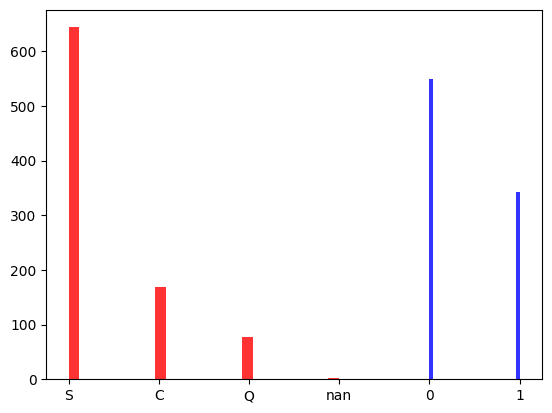

In [17]:
plt.hist(newdf["Embarked"], bins = 25, alpha = 0.8, color = 'red')
plt.hist(newdf["Survived"], bins = 25, alpha = 0.8, color = 'blue')
plt.show()

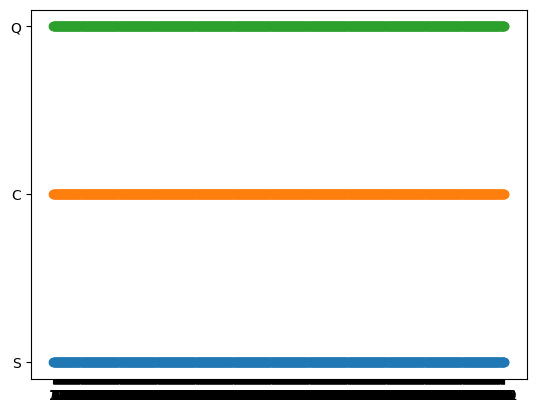

In [18]:
#Second Check;
#I created separated columns for S, C, and Q to check their independent correlations with the other columns as seen below.

newdf["S"] = np.full(len(newdf), "S") # create a new column with S
newdf["C"] = np.full(len(newdf), "C") # create a new column with C
newdf["Q"] = np.full(len(newdf), "Q") # create a new column with Q

#I then used scatter plots to correlated collumns with each of C, S, and Q as follows.
#Again none of S, C, and Q was found to correlate with any of the columns.
#This means replacing the NaNs with either S, C, or Q will not make much difference in the dataset
plt.scatter(newdf["PassengerId"], newdf["S"])
plt.scatter(newdf["PassengerId"], newdf["C"])
plt.scatter(newdf["PassengerId"], newdf["Q"])

In [20]:
#Exercise 3 (iii)

#To check which rows of the "Embarked" column contain the "NaN" value 
newdf[newdf["Embarked"] == "nan"]
#display(newdf.iloc[61])
#display(newdf.iloc[829])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,S,C,Q
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,nan,S,C,Q
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,nan,S,C,Q


In [21]:
#To replace the "nan"  values in the "Embarked" column with "nonan" as seen below;
newdf.at[61, "Embarked"] = "nonan"
newdf.at[829, "Embarked"] = "nonan"

newdf[newdf["Embarked"] == "nonan"] #To verify the change is done

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,S,C,Q
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,nonan,S,C,Q
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,nonan,S,C,Q


In [70]:
len(newdf["S"])
len(newdf["C"])
len(newdf["Q"])

891

In [39]:
#Exercise 4

df3 = pd.read_csv("titanictrain3.csv") #To load a copy of the original file
df3["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
#We know the empty roows are in the Age, Cabine and Embarked columns
#To replace the nans with a zero
df3["Age"] = df3["Age"].fillna(0)
df3["Cabin"] = df3["Cabin"].fillna(0)
df3["Embarked"] = df3["Embarked"].fillna(0)

In [27]:
#To verify the above change;
df3[df3["Age"] == 0]
df3[df3["Cabin"] == 0]
df3[df3["Embarked"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,385,0,38.0,0,0,32,80.0,22,0
829,830,1,1,785,0,62.0,0,0,32,80.0,22,0


In [25]:
#Exercise 5

#We need to convert all the column data into a common data type using astype
#Since Name, Sex, Ticket, Cabin, and Enbarked have object data type, we can convert tom integer as follows;

df3["Name"] = df3["Name"].astype("category").cat.codes
df3["Sex"] = df3["Sex"].astype("category").cat.codes
df3["Ticket"] = df3["Ticket"].astype("category").cat.codes
df3["Cabin"] = df3["Cabin"].astype("category").cat.codes
df3["Embarked"] = df3["Embarked"].astype("category").cat.codes

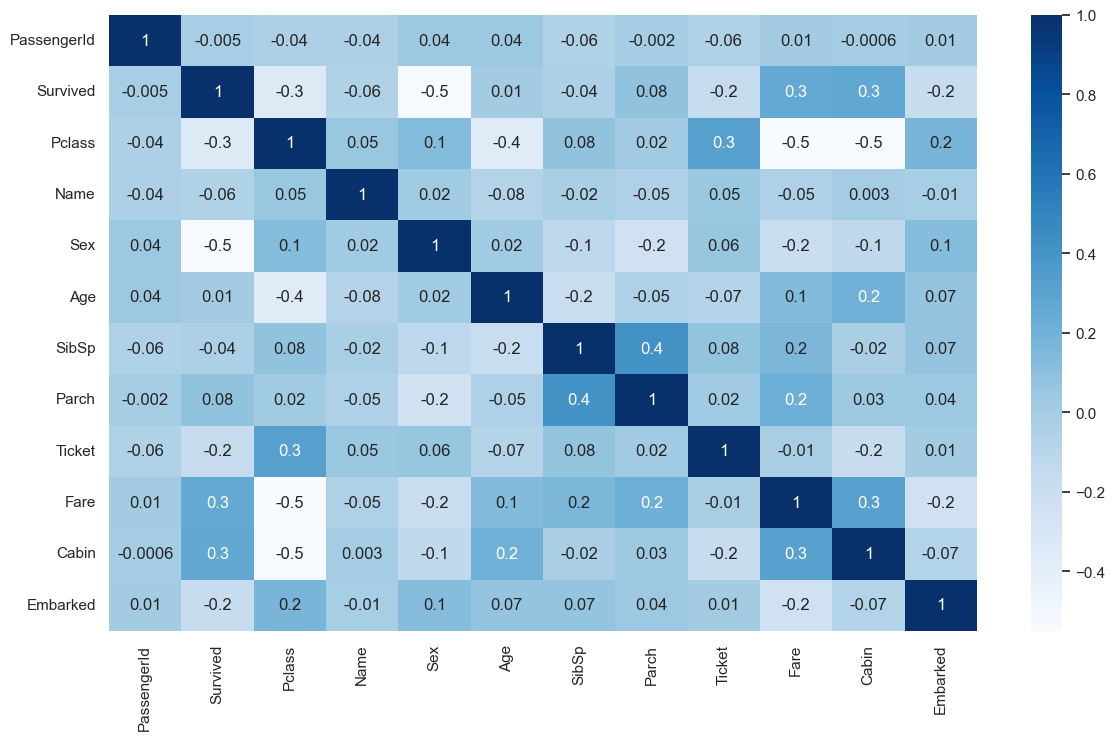

In [35]:
#Following from
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df3.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [ ]:
#From the above heatmap, the columns Sex(-0.5), Pclass(-0.3), Cabin (0.3), Fare (0.3), Ticket (-0.2), and Embarked (-0.2) 

In [37]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import style

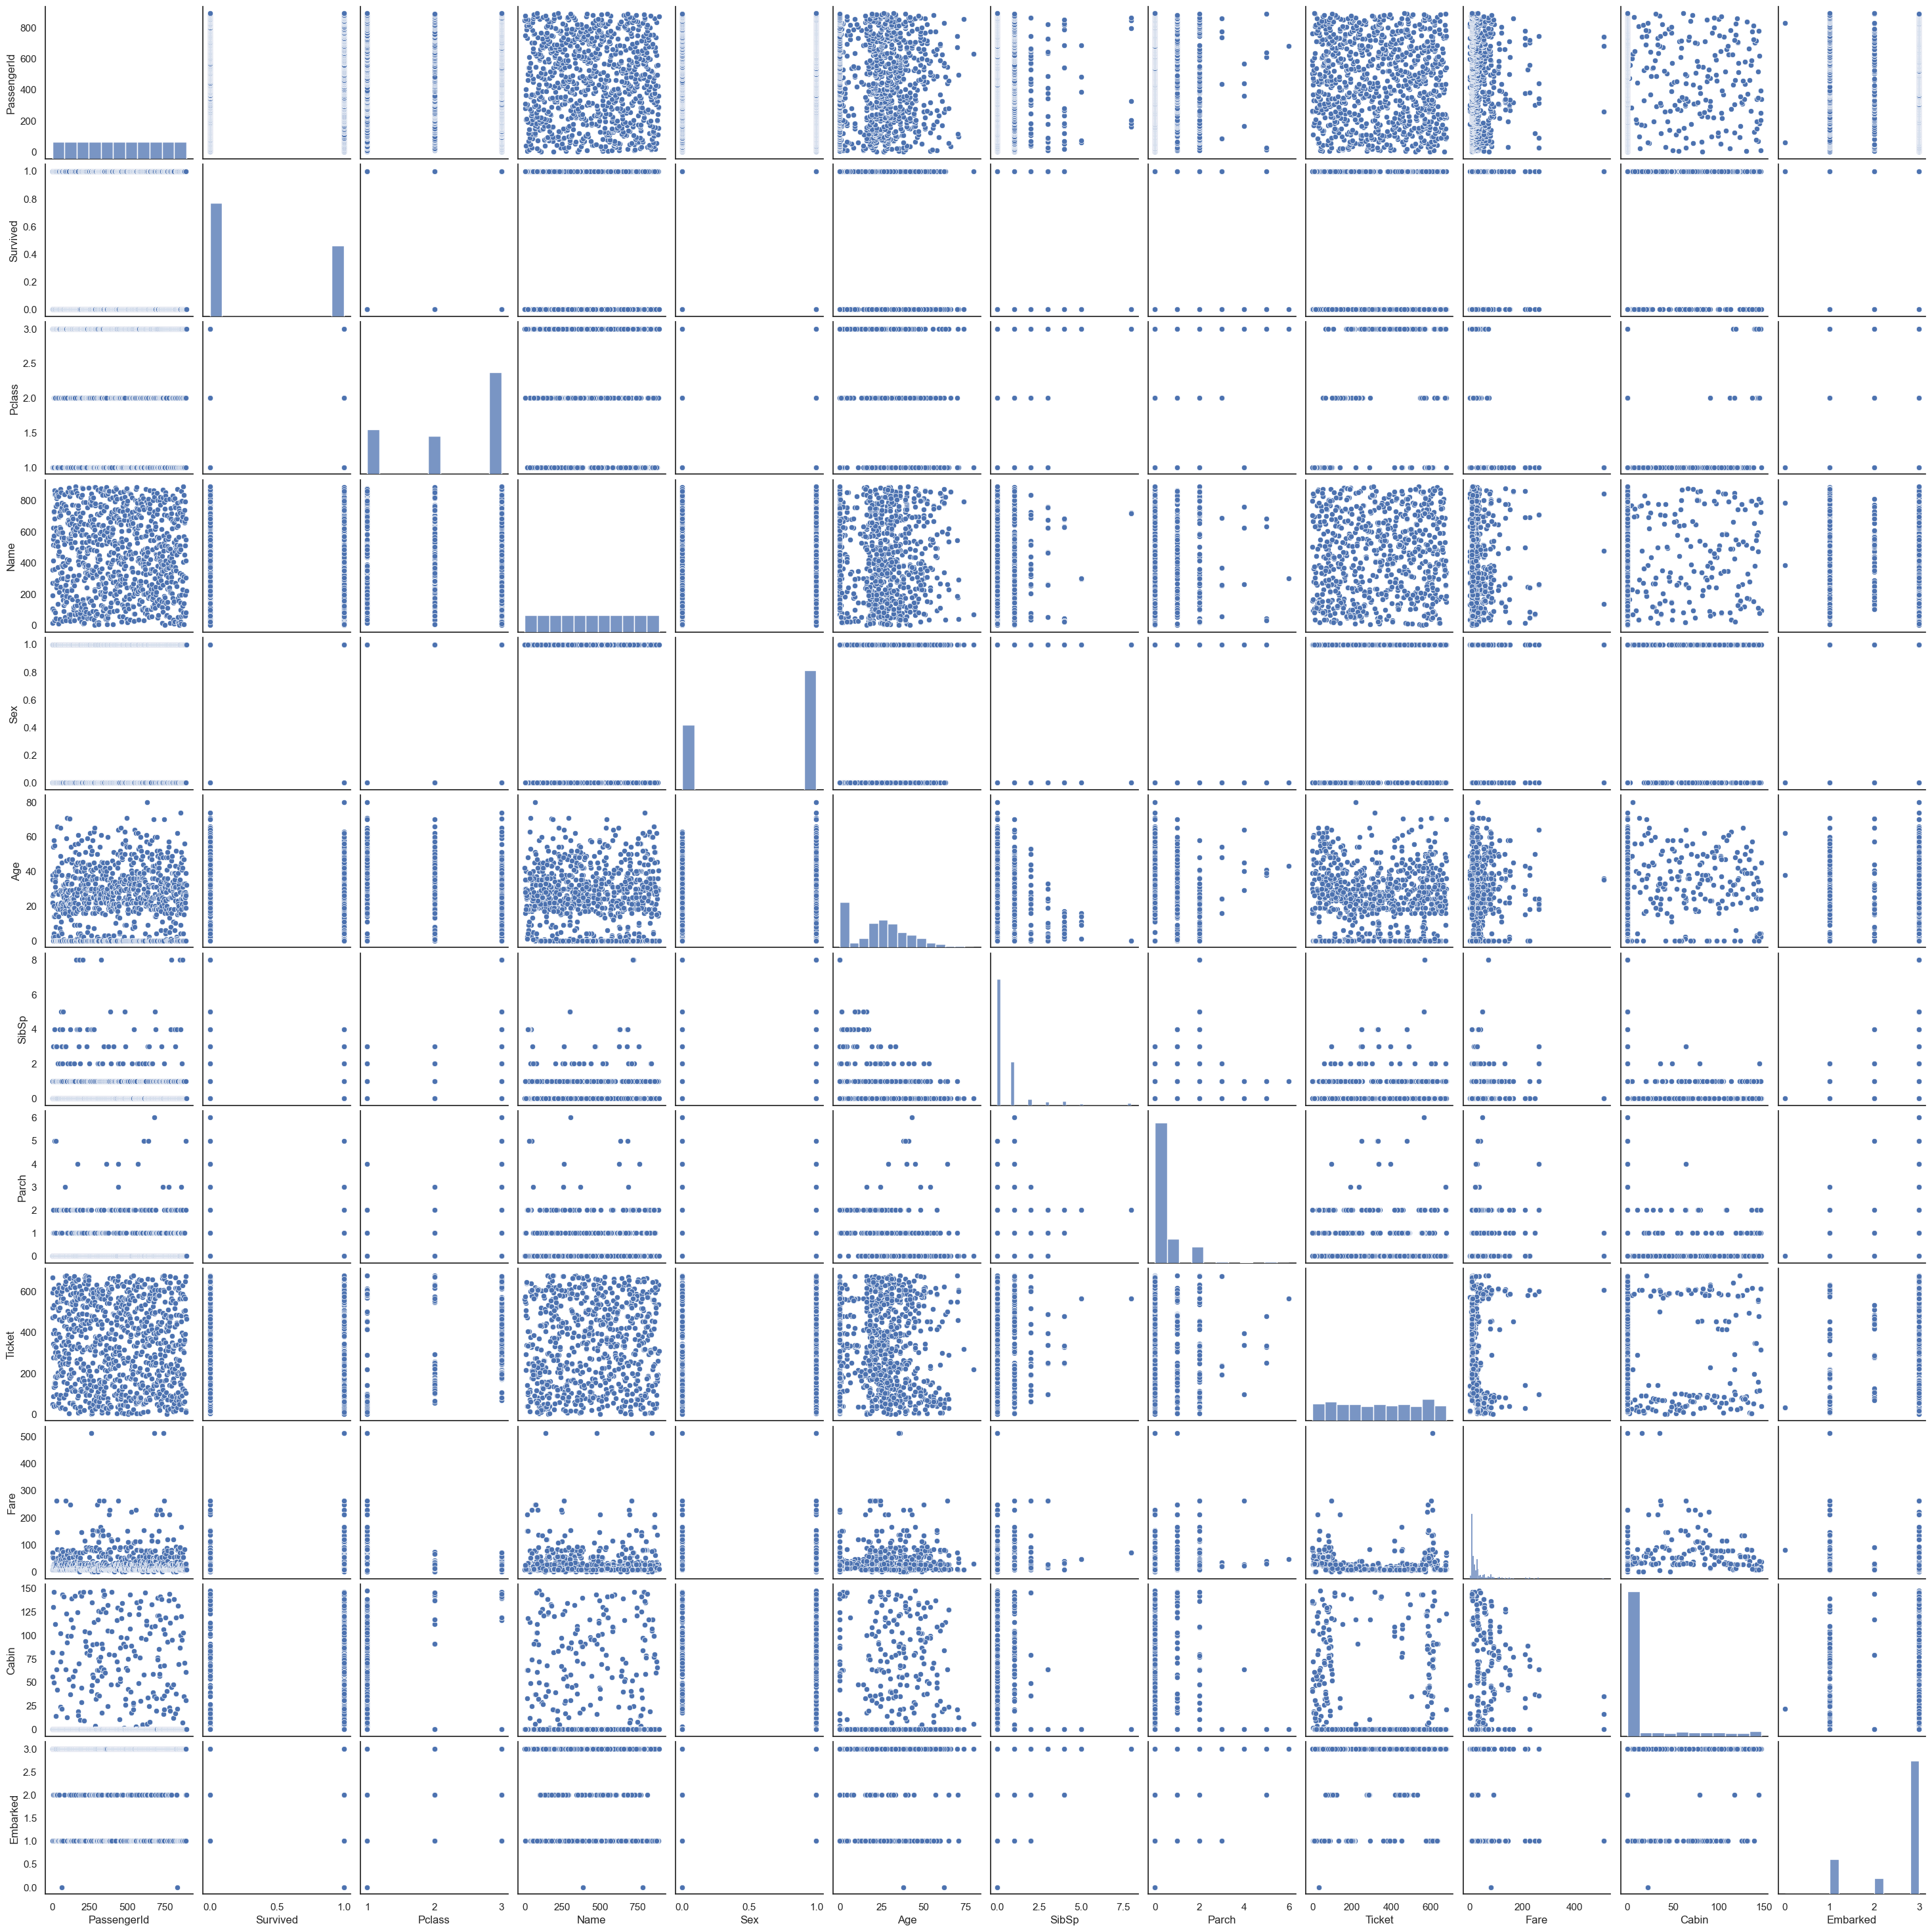

In [36]:
sns.pairplot(df3)

C:\UniHull\Programming\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\UniHull\Programming\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\UniHull\Programming\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#4c72b0'` for the same effect.

  func(*plot_args, **plot_kwargs)


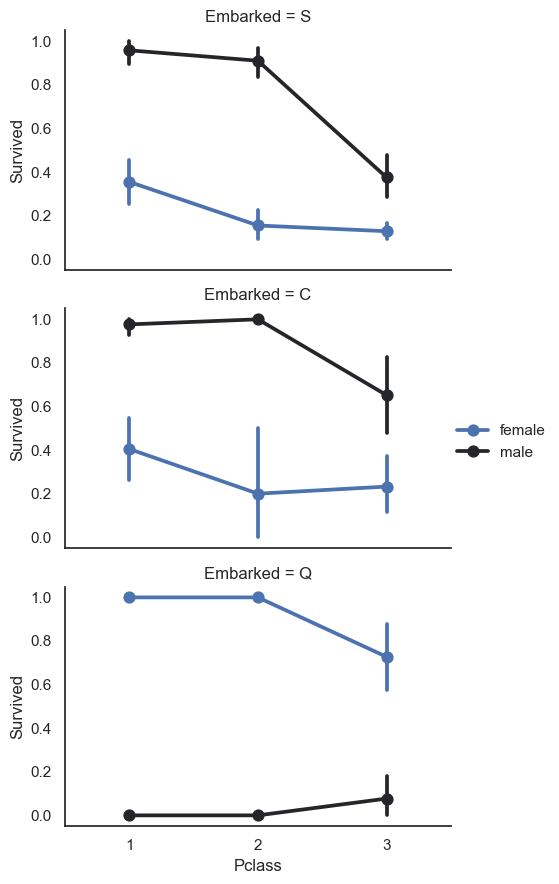

In [48]:
#Accordinhg to Donges (2018);

FacetGrid = sns.FacetGrid(df3, row='Embarked', aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [ ]:
#From the above, the chance to survive seems to be assoiated with gender.Females who embarked in port Q stand a higher chance to survive.
#Men who embarked in port S and C were more likely to survive than those in port Q. The worse case scenario of perishing for men is port Q.

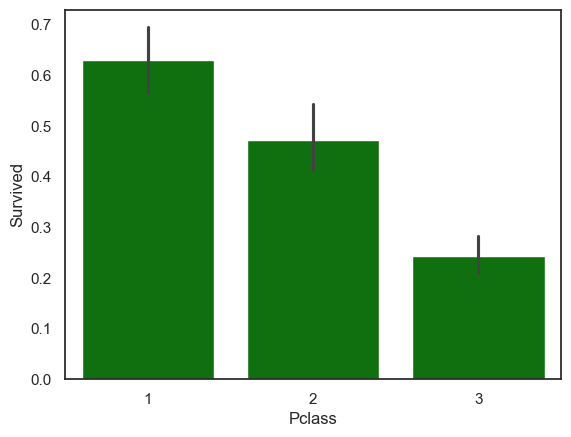

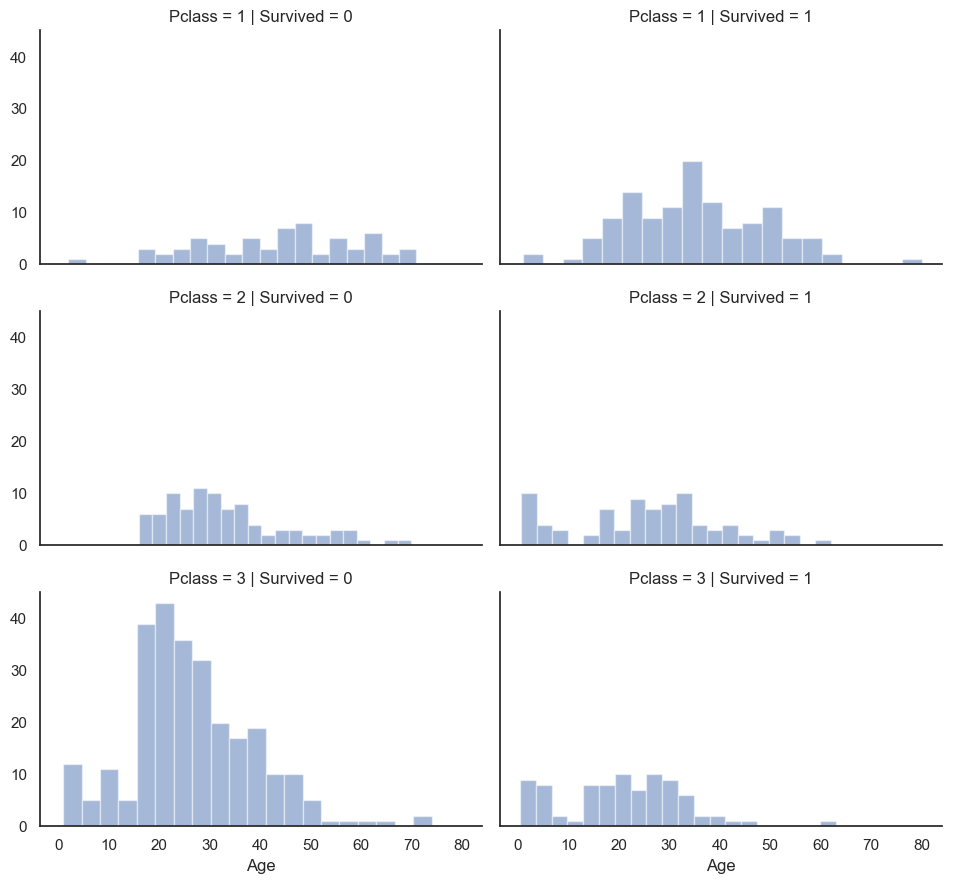

In [60]:
sns.barplot(df3, x = "Pclass", y = "Survived", color = "green")

grid = sns.FacetGrid(df3, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, "Age", alpha=.5, bins=20)
grid.add_legend();

In [ ]:
#Passengers in class 1 have the highest probality of survival followed by those in class 2. The probability to perish is highest in class 3

<Axes: xlabel='Parch', ylabel='Survived'>

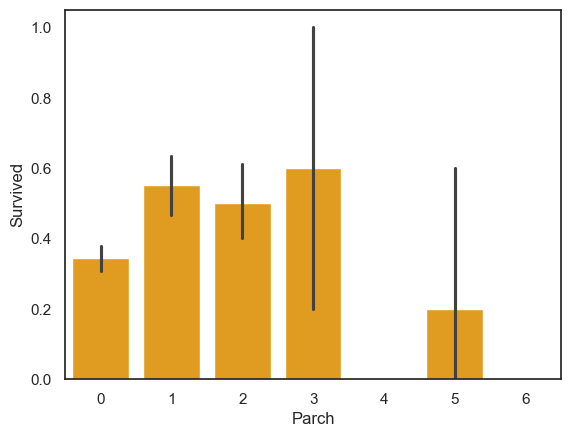

In [63]:
#To investigate parent/children column and survival;
sns.barplot(df3, x = "Parch", y = "Survived", color = "orange")

In [ ]:
#The bar chat above shows that there is a 50% chance or more to survive for passengers with 1 to 3 parent/children.

<Axes: xlabel='SibSp', ylabel='Survived'>

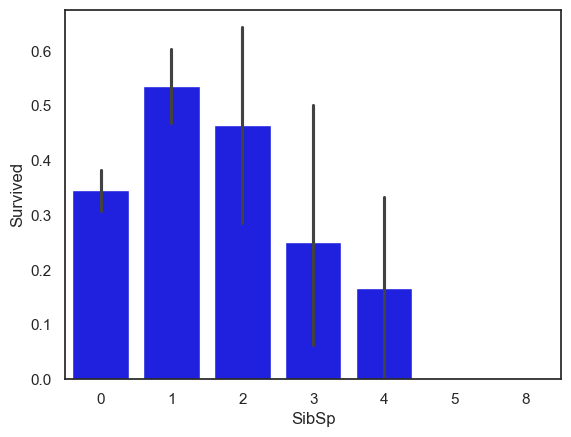

In [66]:
#To check the chnace to survive with respect to siblings and spouse.
sns.barplot(df3, x = "SibSp", y = "Survived", color = "blue")

In [ ]:
#Passengers had a higher probability to survive if they were accompanied by 1 or 2 siblings/spouse

<Axes: xlabel='Cabin', ylabel='Survived'>

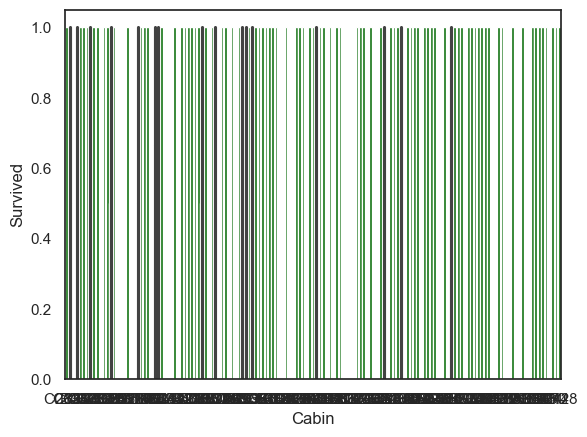

In [110]:
FacetGrid = sns.FacetGrid(df3, row='Embarked', aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

<Axes: xlabel='Fare', ylabel='Survived'>

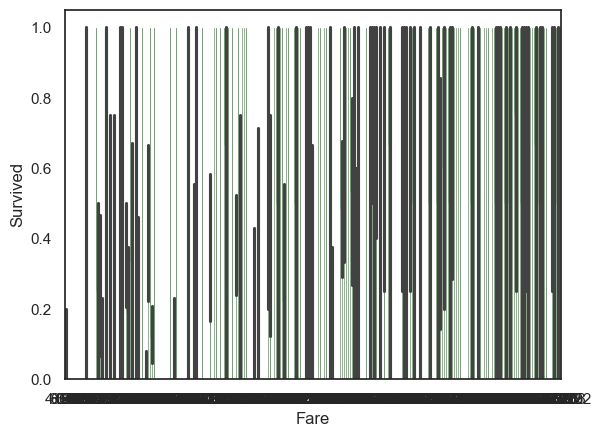

In [111]:
sns.barplot(df3, x = "Fare", y = "Survived", color = "green")